## Reza Torabi - 610300032
## Machine Learning - HW4 : Q4 

In [79]:
import math

def calculate_entropy(data):
    labels = [row[-1] for row in data] 
    label_counts = {}
    for label in labels:
        if label not in label_counts:
            label_counts[label] = 1
        else:
            label_counts[label] += 1

    num_samples = len(data)
    entropy = 0
    for count in label_counts.values():
        probability = count / num_samples
        entropy -= probability * math.log2(probability)
    return entropy

def split_data(data, feature_index, value):
    return [row for row in data if row[feature_index] == value]

def information_gain(data, feature_index):
    base_entropy = calculate_entropy(data)
    unique_values = set(row[feature_index] for row in data)
    
    conditional_entropy = 0
    for value in unique_values:
        splitted_data = split_data(data, feature_index, value)
        prob = len(splitted_data) / len(data)
        conditional_entropy += prob * calculate_entropy(splitted_data)
    
    return base_entropy - conditional_entropy

def build_tree(data, features, depth = 0, max_depth = None):
    labels = [row[-1] for row in data]
    if len(set(labels)) == 1:
        return labels[0]
    
    if not features or (max_depth is not None and depth >= max_depth):
        return max(set(labels), key = labels.count)
    
    best_feature = max(features, key = lambda f: information_gain(data, f))
    other_features = [f for f in features if f != best_feature]
    tree = {best_feature: {}}
    unique_values = set(row[best_feature] for row in data)

    for value in unique_values:
        splitted_data = split_data(data, best_feature, value)
        subtree = build_tree(splitted_data, other_features, depth + 1, max_depth)
        tree[best_feature][value] = subtree
    return tree


def print_tree(tree, feature_names, depth=0):
    if not isinstance(tree, dict):
        print("-" * depth * 4 + f"Class: *{tree}*")
        return
    
    for feature, branches in tree.items():
        for value, subtree in branches.items():
            print(" " * depth * 4 + f"(if {feature_names[feature]} == {value})")
            print_tree(subtree, feature_names, depth + 1)

data = [
    # Alt    Bar    Fri    Hun    Pat    Price  Rain   Res      Type      Est     Goal
    ['Yes', 'No',  'No',  'Yes', 'Some', '$$$', 'No',  'Yes', 'French',  '0-10',  'Yes'],
    ['Yes', 'No',  'No',  'Yes', 'Full',  '$',  'No',  'No',  'Thai',    '30-60', 'No'],
    ['No',  'Yes', 'No',  'No',  'Some',  '$',  'No',  'No',  'Burger',  '0-10',  'Yes'],
    ['Yes', 'No',  'Yes', 'Yes', 'Full',  '$',  'Yes', 'No',  'Thai',    '10-30', 'Yes'],
    ['Yes', 'No',  'Yes', 'No',  'Full', '$$$', 'No',  'Yes', 'French',   '>60',  'No'],
    ['No',  'Yes', 'No',  'Yes', 'Some',  '$$', 'Yes', 'Yes', 'Italian', '0-10',  'Yes'],
    ['No',  'Yes', 'No',  'No',  'None',  '$',  'Yes', 'No',  'Burger',  '0-10',  'No'],
    ['No',  'No',  'No',  'Yes', 'Some',  '$$', 'Yes', 'Yes', 'Thai',    '0-10',  'Yes'],
    ['No',  'Yes', 'Yes', 'No',  'Full',  '$',  'Yes', 'No',  'Burger',   '>60',  'No'],
    ['Yes', 'Yes', 'Yes', 'Yes', 'Full', '$$$', 'No',  'Yes', 'Italian', '10-30', 'No'],
    ['No',  'No',  'No',  'No',  'None',  '$',  'No',  'No',  'Thai',    '0-10',  'No'],
    ['Yes', 'Yes', 'Yes', 'Yes', 'Full',  '$',  'No',  'No',  'Burger',  '30-60', 'Yes'],
]
feature_indexes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
feature_names = ['Alt', 'Bar', 'Fri', 'Hun', 'Pat', 'Price', 'Rain', 'Res', 'Type', 'Est']
decision_tree = build_tree(data, feature_indexes)
# print(decision_tree)
print("Decision Tree:")
print_tree(decision_tree, feature_names)


Decision Tree:
(if Pat == None)
----Class: *No*
(if Pat == Full)
    (if Hun == No)
--------Class: *No*
    (if Hun == Yes)
        (if Type == Italian)
------------Class: *No*
        (if Type == Thai)
            (if Fri == No)
----------------Class: *No*
            (if Fri == Yes)
----------------Class: *Yes*
        (if Type == Burger)
------------Class: *Yes*
(if Pat == Some)
----Class: *Yes*


Feature: Alt
  0 -> No
  1 -> Yes
Feature: Bar
  0 -> No
  1 -> Yes
Feature: Fri
  0 -> No
  1 -> Yes
Feature: Hun
  0 -> No
  1 -> Yes
Feature: Pat
  0 -> Full
  1 -> None
  2 -> Some
Feature: Price
  0 -> $
  1 -> $$
  2 -> $$$
Feature: Rain
  0 -> No
  1 -> Yes
Feature: Res
  0 -> No
  1 -> Yes
Feature: Type
  0 -> Burger
  1 -> French
  2 -> Italian
  3 -> Thai
Feature: Est
  0 -> 0-10
  1 -> 10-30
  2 -> 30-60
  3 -> >60


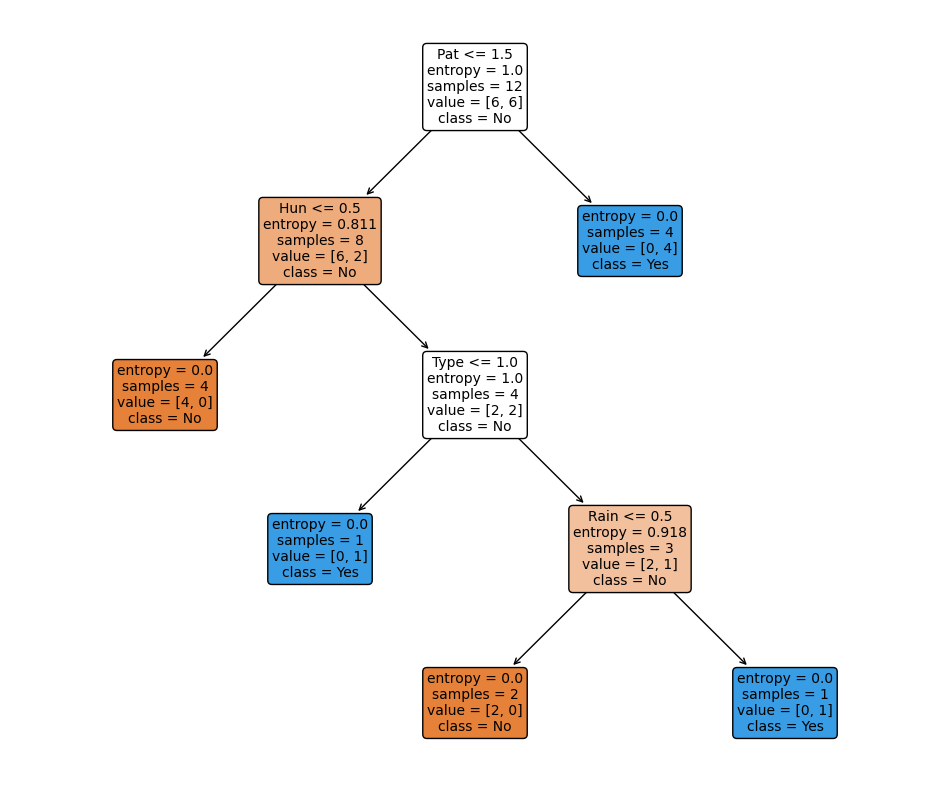

In [92]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

new_data = [row[:-1] for row in data]
labels = [row[-1] for row in data]

feature_encoders = {feature: LabelEncoder() for feature in feature_names}
data_encoded = [[feature_encoders[feature_names[i]].fit_transform([row[i] for row in new_data])[j] 
              for i in range(len(feature_names))] for j in range(len(new_data))]

label_encoder = LabelEncoder()
label_encoded = label_encoder.fit_transform(labels)

for i, encoder in enumerate(feature_encoders.values()):
    print(f"Feature: {feature_names[i]}")
    for j, label in enumerate(encoder.classes_):
        print(f"  {j} -> {label}")

new_decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth = 8)
new_decision_tree.fit(data_encoded, label_encoded)

plt.figure(figsize=(12, 10))
tree.plot_tree(
    new_decision_tree,
    feature_names = feature_names,
    class_names = ['No', 'Yes'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()